In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('/home/sunbeam/Documents/ML/ml-o-02-data/ML-02-master/day09/heart_disease.csv')

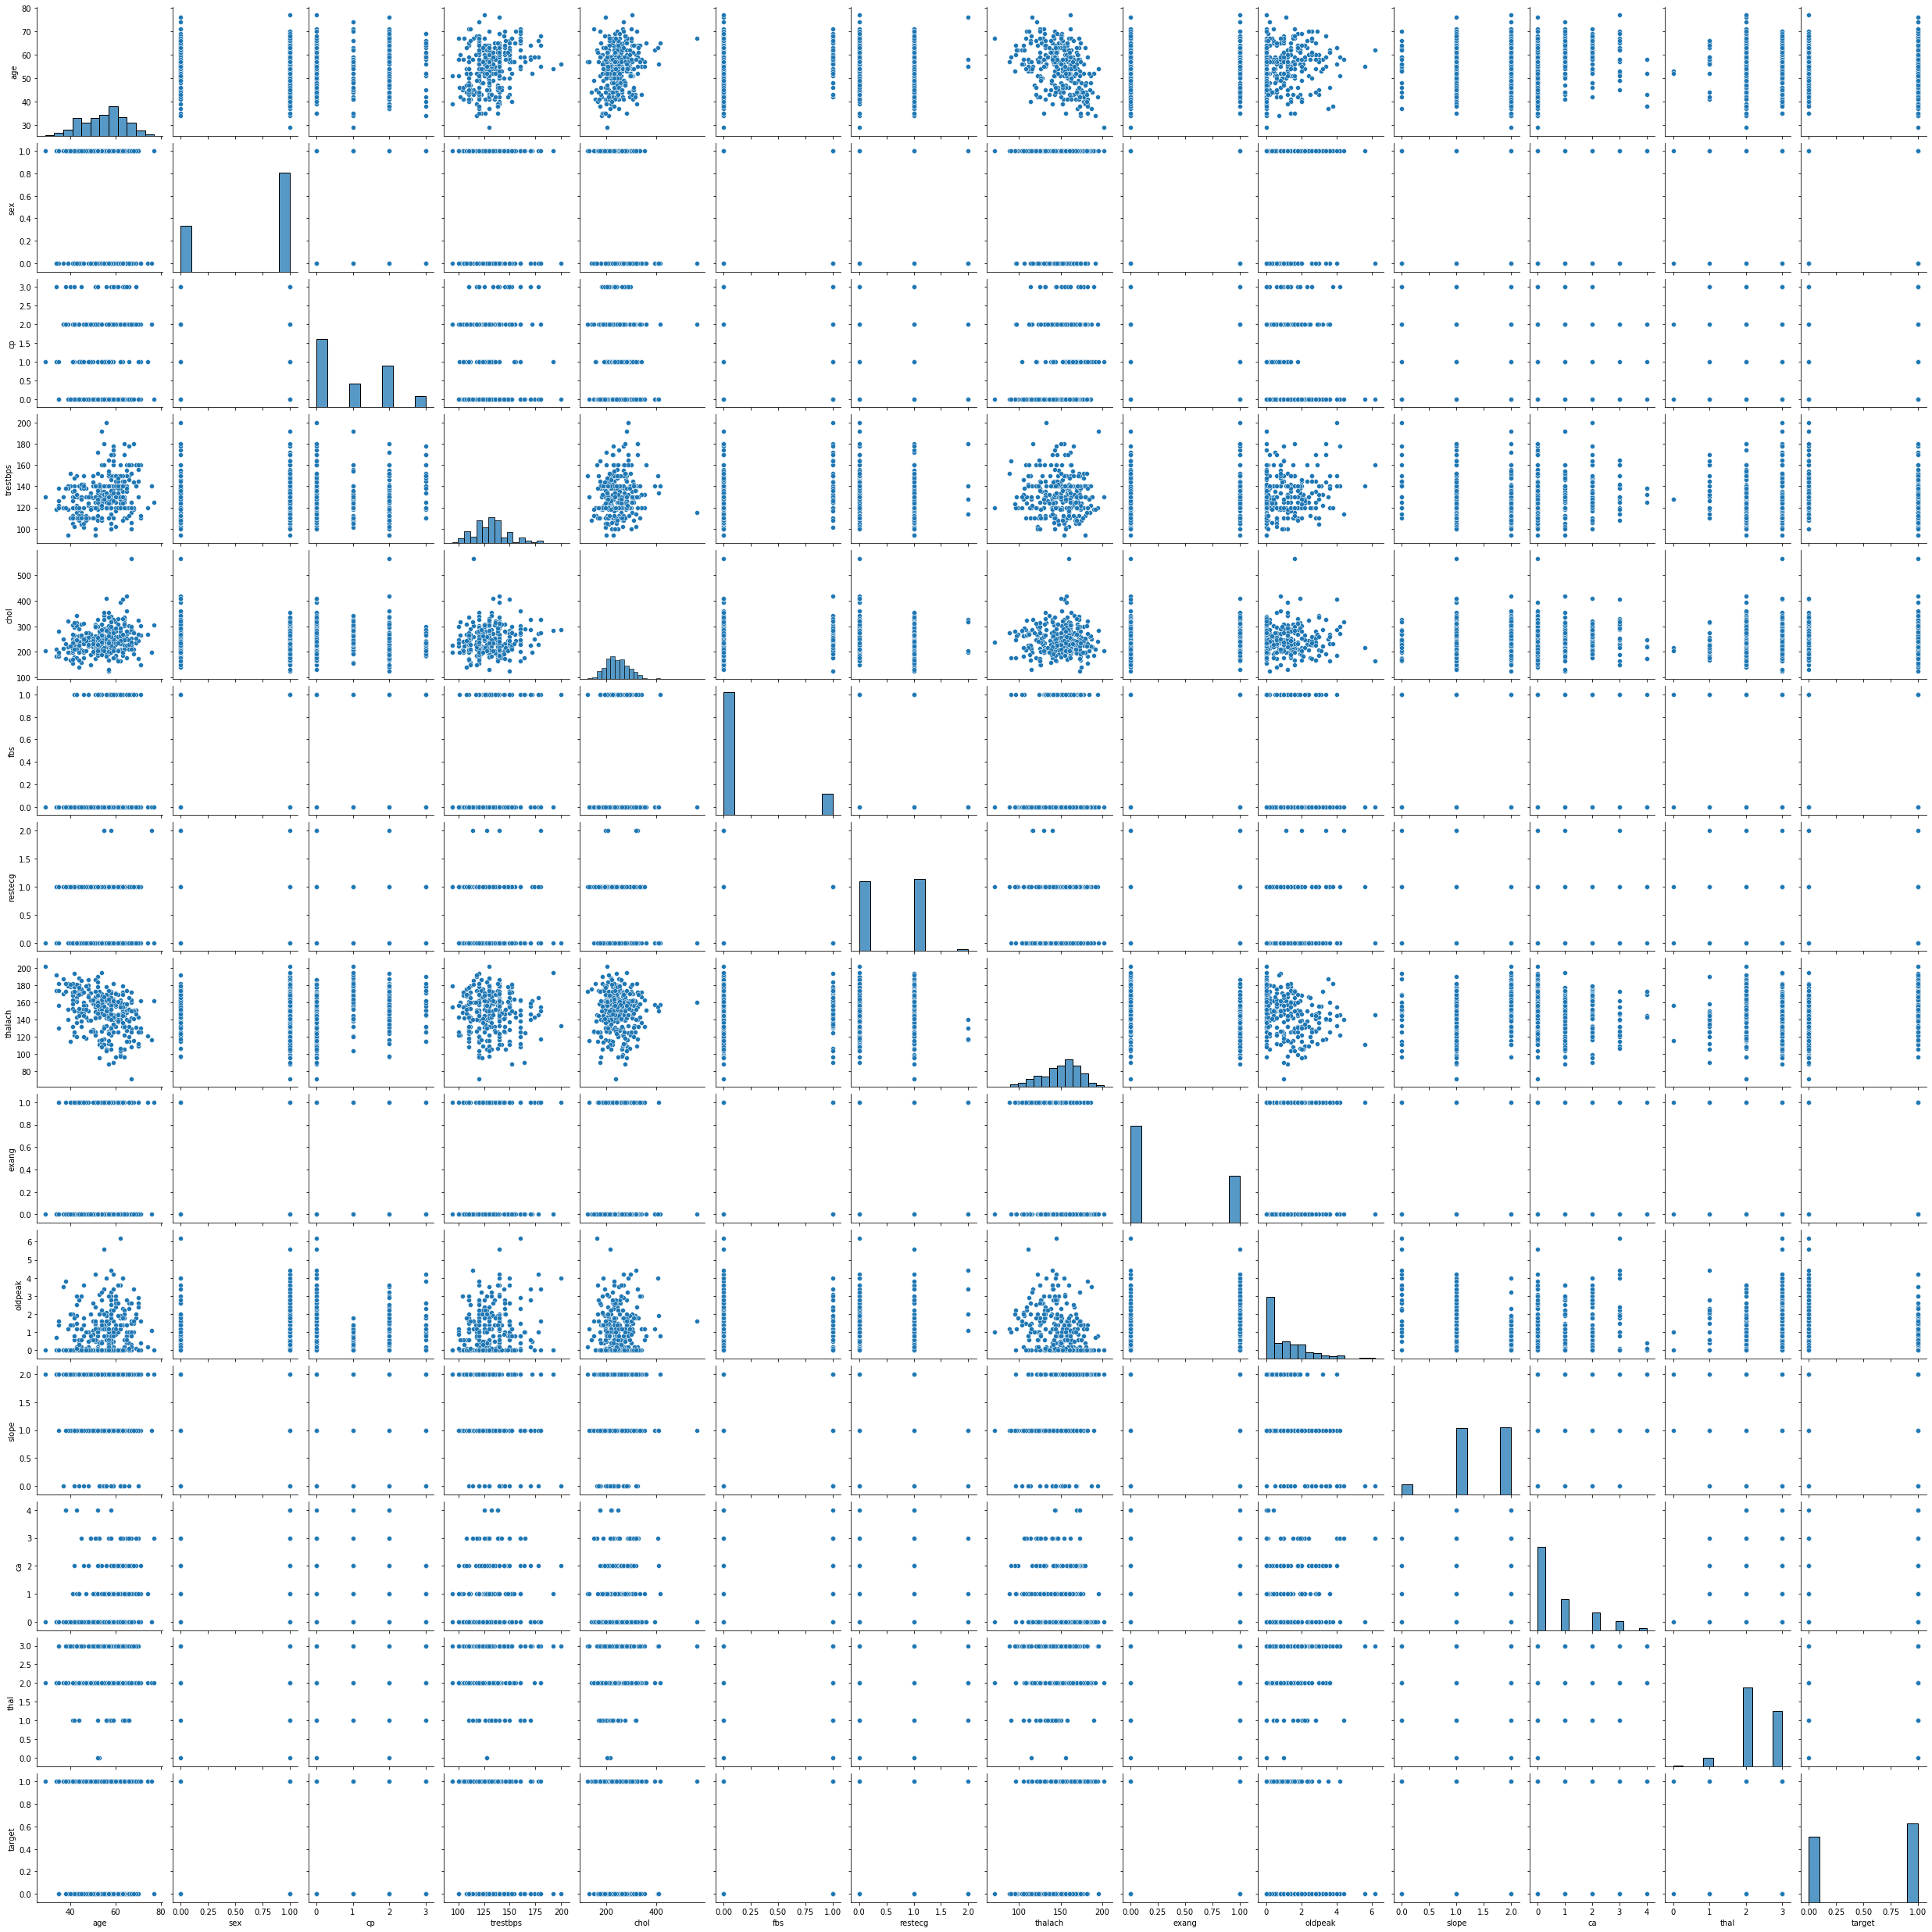

In [3]:
import seaborn as sns
sns.pairplot(df)

In [4]:
for i in df.columns:
    print("~"*30)
    print("for",i,"corr coff is")
    print(np.corrcoef(df[i],df['target']))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for age corr coff is
[[ 1.         -0.22543872]
 [-0.22543872  1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for sex corr coff is
[[ 1.         -0.28093658]
 [-0.28093658  1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for cp corr coff is
[[1.         0.43379826]
 [0.43379826 1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for trestbps corr coff is
[[ 1.         -0.14493113]
 [-0.14493113  1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for chol corr coff is
[[ 1.         -0.08523911]
 [-0.08523911  1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for fbs corr coff is
[[ 1.         -0.02804576]
 [-0.02804576  1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for restecg corr coff is
[[1.        0.1372295]
 [0.1372295 1.       ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for thalach corr coff is
[[1.         0.42174093]
 [0.42174093 1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for exang corr coff is
[[ 1.         -0.43675708]
 [-0.43675708  1.        ]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for old

In [5]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# find x and y
x = df.drop(['chol', 'fbs', 'target'], axis=1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12345)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.score(x_train, y_train)

0.5296580987593515

In [14]:
y_predictions = model.predict(x_test)
print(y_predictions)

[ 0.07312316  0.77252023  0.53162603  0.23361549  0.05290533  0.83780581
 -0.03923505  0.26195706  0.17322757  0.89613228  0.84661517  0.97087224
  0.72301491  0.71729108  1.1450881   0.38338671  0.04636835  0.06464331
  0.37187483  0.75890361  0.75507844  0.834791   -0.36941427  0.57826166
  0.73250475  0.59931923  0.70938865  1.187597    0.61341418  0.79891188
  0.33015147  0.80957339  1.0040779  -0.06487004  0.57578555  1.02219521
  1.10257746  1.03764564  0.6624085   0.22419044  0.42878189  0.17708241
  0.41050714  0.47283439 -0.084181    0.37251816  1.17534968  0.58296971
  0.24753121 -0.16478162  0.82368637  0.33302652  0.54449201 -0.15569075
  0.64706782  0.60767073  0.78793156  0.59647727  0.06006094  0.8529187
  0.52350959]


In [15]:
model.score(x_test, y_test)

0.427273746172662

In [17]:
from sklearn.metrics import classification_report
y_test_predictions = model.predict(x_test)
for index in range(len(y_test_predictions)):
    if y_test_predictions[index] > 0.5:
        y_test_predictions[index]  = 1
    else:
        y_test_predictions[index] = 0

In [18]:
report = classification_report(y_test, y_test_predictions)
report

'              precision    recall  f1-score   support\n\n           0       0.80      0.80      0.80        25\n           1       0.86      0.86      0.86        36\n\n    accuracy                           0.84        61\n   macro avg       0.83      0.83      0.83        61\nweighted avg       0.84      0.84      0.84        61\n'